In [2]:
import time
import sys
from collections import Counter
import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import pylab
import gzip
from Bio import SeqIO
import seaborn as sns
import string
from matplotlib import rcParams

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
#Open .csv file for summary data
XCDP07_df_summary = pd.read_csv('/Users/dyounger/GoogleDrive/UW_Work/PAPER_YSA/Code/SSMLibraryAnalysis/CSV_outputs_summary_df/XCDP07_df_summary.csv')

#specify intended target for binder and off targets
target='BclXL'
off_targets=['Bfl1','BclB','Bcl2','BclW','Mcl1']

In [4]:
#A function for labeleing datapoints on a scatter plot with strings
def label_point_orig(x, y, val, ax, size):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']-.035, point['y']-.015, str(point['val']),
                fontsize=size, horizontalalignment='right')

In [5]:
#set up the dataframe for vizualization 
#data for the native (unmutated) sequence is kept separate from the SSM mutants, 
#so all operations have to be done on both

native=XCDP07_df_summary[(XCDP07_df_summary['aa'] == '-')]
data=XCDP07_df_summary[(XCDP07_df_summary['aa'] != '-')]

#change type designations from letters to numbers for plot interpretation
data['type']=data['type'].replace('S',1)
data['type']=data['type'].replace('B',2)
data['type']=data['type'].replace('C',3)
data['type']=data['type'].replace('IP',4)
data['type']=data['type'].replace('IC',5)

#for some reason, I wanted to call this raw_data instead of data...
raw_data=data

#Define on target affinity [on target count / naive count]
raw_data['affinity']=(raw_data[target]/raw_data['naive']).fillna(value=0)
#data['affinity']=(data[target]/data['naive']).fillna(value=0)
native['affinity']=(native[target]/native['naive']).fillna(value=0)

#define specificity [(on target count - max off target count)/total count]
raw_data['specificity']=((raw_data[target]-raw_data[off_targets].max(axis=1))/raw_data['total']).fillna(value=0)
#data['specificity']=((data[target]-data[off_targets].max(axis=1))/data['total']).fillna(value=0)
native['specificity']=((native[target]-native[off_targets].max(axis=1))/native['total']).fillna(value=0)

#define combined affinity / specificity term
raw_data['aff_spec']=raw_data['affinity']+2*raw_data['specificity']
#data['aff_spec']=data['affinity']+2*data['specificity']
native['aff_spec']=native['affinity']+2*native['specificity']

#rename data to begin fresh for each plot
original_data=raw_data

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



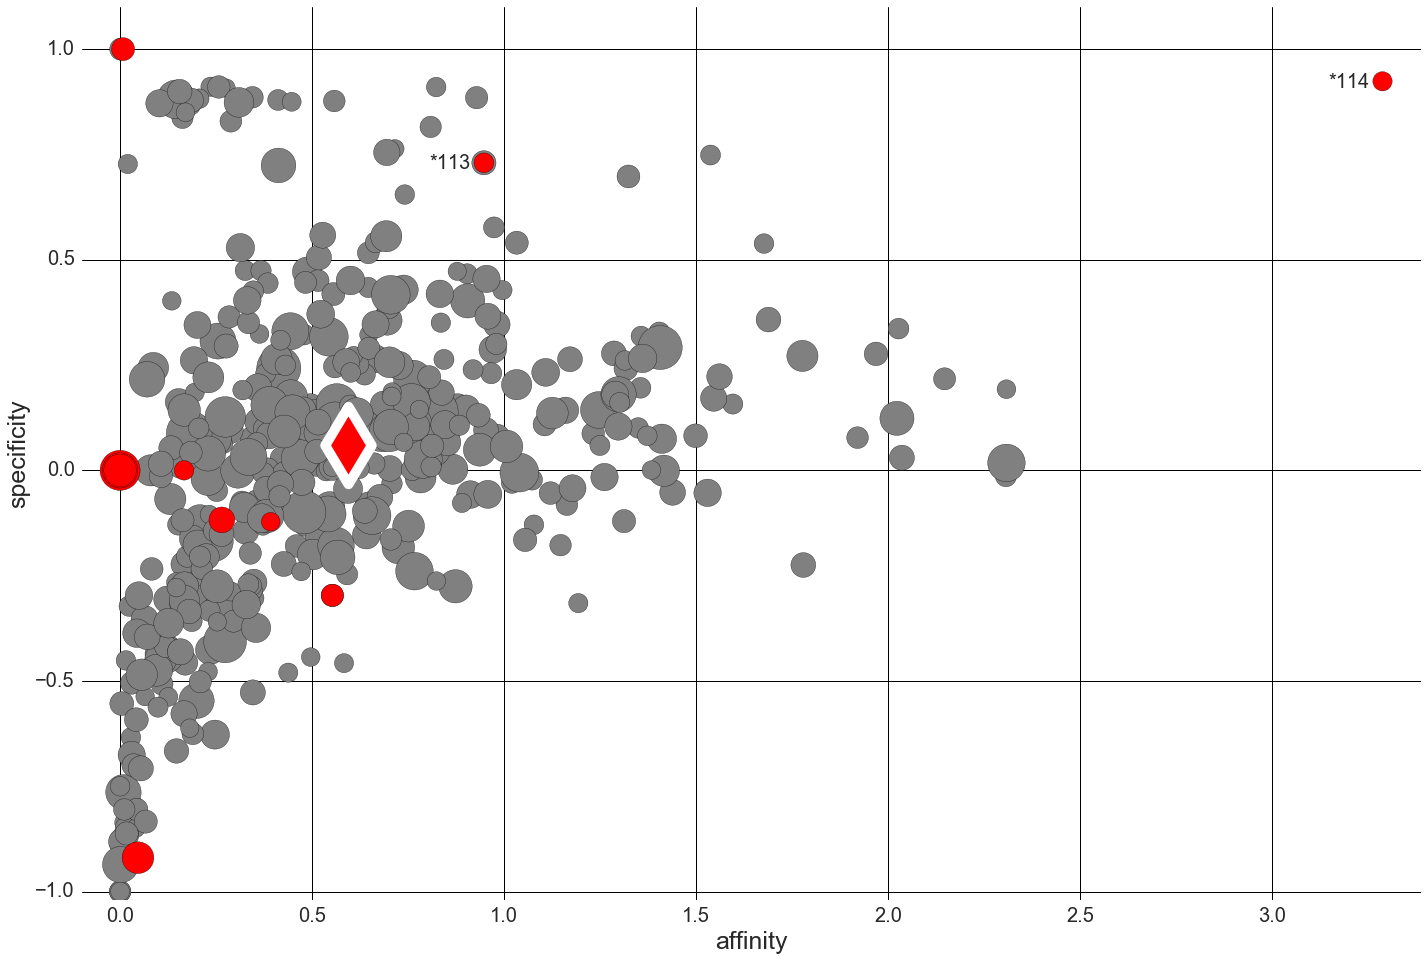

In [8]:
#Analysis of stop codons

#redefine data:
data=original_data
#Select cutoff for confidence:
data=data.loc[(data.naive > 400), :]
data=data.loc[(data.affinity < 4), :]

#select the data you wish to look at:
x='affinity'
y='specificity'
size=((data['naive']/1.2))
label_subset=raw_data[raw_data['aa']=='*']
label_subset=label_subset[label_subset['position']>112]
label_subset=label_subset[label_subset['position']<115]

non_stop = data[data['aa']!='-']
stop = raw_data[raw_data['aa']=='*']

#plot
fig=figure()
ax=fig.add_subplot(111)
ax.set_axis_bgcolor('white')
non_stop.plot.scatter(x=x,
                  y=y,
                  xlim=[non_stop[x].min()-.1,non_stop[x].max()+.1],
                  ylim=[non_stop[y].min()-.1,non_stop[y].max()+.1],
                  color='grey',
                  s=size,
                  ax=ax,
                  figsize=(24,16))
stop.plot.scatter(x=x,
                  y=y,
                  xlim=[stop[x].min()-.1,stop[x].max()+.1],
                  ylim=[stop[y].min()-.1,stop[y].max()+.1],
                  color='red',
                  s=size,
                  ax=ax)
native.plot.scatter(x=x,
                    y=y,
                    marker='d',
                    c='r',
                    lw=10,
                    edgecolor='w',
                    s=3000,
                    ax=ax)

label_point_orig(label_subset[x], label_subset[y], label_subset['combined'], plt,20)

plt.xlabel(x, fontsize=25)
plt.ylabel(y,fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

grid(b=True, which='major', color='black', linestyle='-')
plt.show()
fig.savefig('early_stop',bbox_inches='tight',dpi=300)

In [84]:
#You can also look at a dataframe containing all of the early stop mutations to get more quantitative info
print label_subset

      Unnamed: 0 combined aa  position  naive  total  Bfl1  BclB  Bcl2  BclW  \
19            19       *3  *         3    598      0     0     0     0     0   
34            34       *5  *         5    271      0     0     0     0     0   
44            44       *6  *         6    154      0     0     0     0     0   
56            56       *7  *         7    171      0     0     0     0     0   
104          104      *11  *        11    512      0     0     0     0     0   
156          156      *15  *        15    597   2547   735   140  1086   142   
169          169      *16  *        16     65      0     0     0     0     0   
182          182      *17  *        17     75      0     0     0     0     0   
196          196      *18  *        18   1090      0     0     0     0     0   
266          266      *26  *        26    109      0     0     0     0     0   
296          296      *29  *        29      3      0     0     0     0     0   
332          332      *32  *        32  

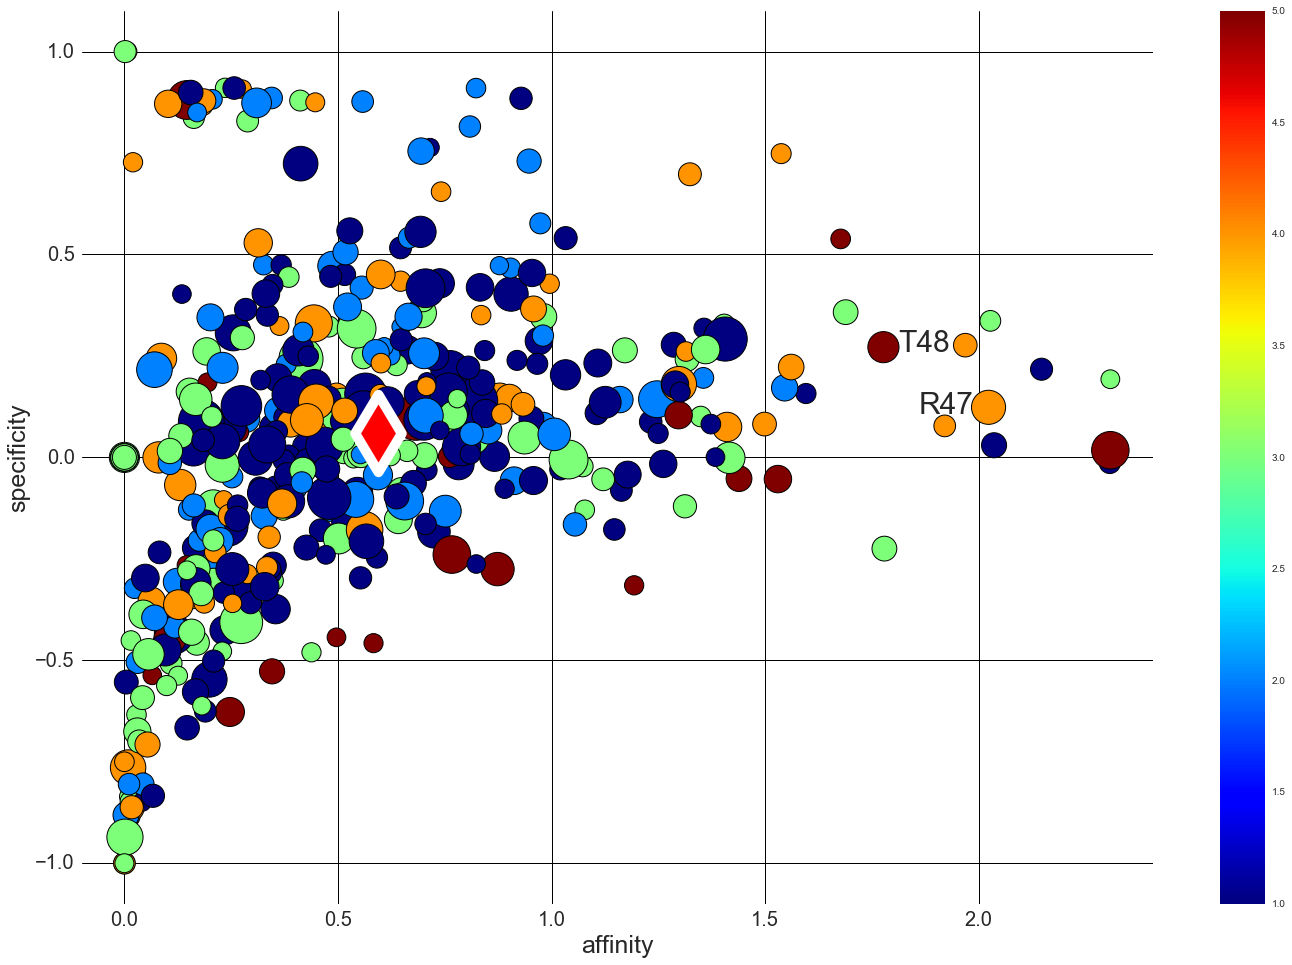

In [9]:
#redefine data:
data=original_data

#Select cutoff for confidence:
data=data.loc[(data.naive > 400), :]
data=data.loc[(data.affinity < 4), :]

#select the data you wish to look at:
x='affinity'
y='specificity'
color='type'
size=((data['naive']/1.2))
label_subset=data[data['affinity']>1]

#These are the mutations that are known to be benefitial from a traditional SSM yeast surface display enrichment
mutated=data[data['combined'].isin(['R47','T48'])]

#plot
fig=figure()
ax=fig.add_subplot(111)
ax.set_axis_bgcolor('white')
data.plot.scatter(x=x,
                  y=y,
                  xlim=[data[x].min()-.1,data[x].max()+.1],
                  ylim=[data[y].min()-.1,data[y].max()+.1],
                  cmap='jet',
                  color=data[color],
                  s=size,
                  lw=1,
                  ax=ax,
                  figsize=(24,16))

native.plot.scatter(x=x,
                    y=y,
                    marker='d',
                    c='r',
                    lw=10,
                    edgecolor='w',
                    s=3000,
                    ax=ax)

plt.xlabel(x, fontsize=25)
plt.ylabel(y,fontsize=25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

label_point_orig(mutated['affinity'], mutated['specificity'], mutated['combined'], plt,30)

grid(b=True, which='major', color='black', linestyle='-')
plt.show()
fig.savefig('mutations',bbox_inches='tight',dpi=300)

In [10]:
#we can take a look at the exact counts observed for the mutatons
print mutated

     Unnamed: 0 combined aa  position  naive   total  Bfl1   BclB    Bcl2  \
509         509      R47  R      47.0   1395  6060.0  65.0  196.0  2074.0   
524         524      T48  T      48.0    667  2242.0   2.0   12.0   693.0   

      BclW   BclXL   Mcl1  type  affinity  specificity  aff_spec  
509  749.0  2822.0  154.0     4  2.022939     0.123432  2.269804  
524  220.0  1313.0    2.0     4  1.968516     0.276539  2.521593  


In [94]:
#and we can compare those counts to the counts observed for the naive protein
print native

   Unnamed: 0 combined aa  position   naive   total  Bfl1   BclB    Bcl2  \
0           0        0  -         0  314509  449737  2952  24523  159861   

    BclW    ...     Mcl1  enrichment  type total_score   sc  ddg  sasa  \
0  68577    ...     7405         0.0     0         0.0  0.0  0.0   0.0   

   affinity  specificity  aff_spec  
0   0.59273     0.059052  0.710835  

[1 rows x 21 columns]
